In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## ODI_score Table

In [2]:
# Reading ODI_Table data
odi_score = pd.read_csv('ODI_score.csv')
odi_score

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
8,9,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90


In [3]:
odi_score.rename(columns={'Unnamed: 0':'Matches'}, inplace=True)
odi_score

,Matches,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
8,9,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90


In [4]:
# check data types
odi_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
Matches       295 non-null int64
Runs          295 non-null object
Mins          295 non-null object
BF            295 non-null object
4s            295 non-null object
6s            295 non-null object
SR            295 non-null object
Pos           295 non-null object
Dismissal     295 non-null object
Inns          295 non-null object
Opposition    295 non-null object
Ground        295 non-null object
Start Date    295 non-null object
dtypes: int64(1), object(12)
memory usage: 30.0+ KB


In [5]:
# checking Properties
odi_score.describe()

,Matches
count,295.00000
mean,148.00000
std,85.30338
min,1.00000
25%,74.50000
50%,148.00000
75%,221.50000
max,295.00000


In [6]:
# checking for Null Values
odi_score.isnull().sum()

Matches       0
Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [7]:
# Replacing 'DNB', 'TDNB' with Zeroes for Calculation purpose
odi_score['Runs'].replace(to_replace=['DNB','TDNB'], value=0,inplace=True)

In [8]:
# removing * from Runs Columns
odi_score.Runs = odi_score.Runs.str.strip('*')
odi_score

,Matches,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
8,9,NaN,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90


In [9]:
# filling All Null values with Zeroes
odi_score.Runs.fillna(0,inplace=True)

In [10]:
# making all values into integer
odi_score.Runs = list(map(int,odi_score.Runs))

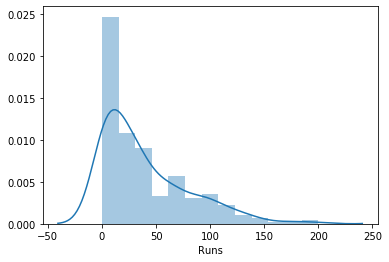

In [11]:
# plotting DistPlot to check how the Runs are Varying
sns.distplot(odi_score['Runs'],hist=True)

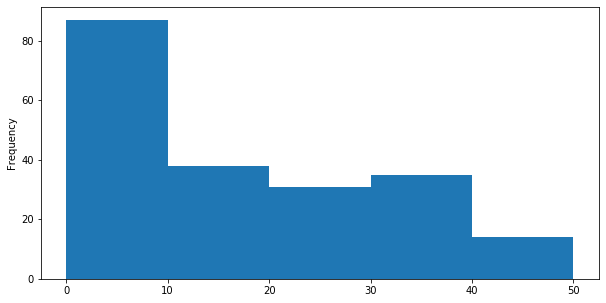

In [12]:
odi_score['Runs'].plot(kind='hist',figsize=(10,5),bins=[0,10,20,30,40,50])

## From above plot it is clear that the most runs are in the range 0-10 runs

In [13]:
# replacing all '-' with Zeroes for easier calculation
odi_score['4s'].replace(to_replace='-',value=0,inplace=True)
#odi_score['4s']

In [14]:
# converting all values into integer
odi_score['4s'] = list(map(int,odi_score['4s']))

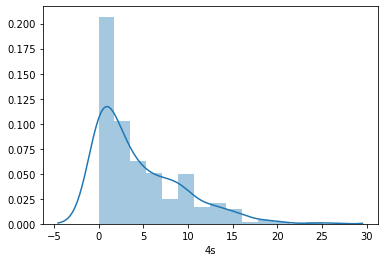

In [15]:
# Plotting 4s in DistPlot to see how the Runs vary
sns.distplot(odi_score['4s'],hist=True)

In [16]:
odi_score.columns

Index(['Matches', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal',
       'Inns', 'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [17]:
#sns.catplot(kind="box", data=odi_score,height=6);

## Populatity Data_CSV

In [18]:
# reading Popularity Table
popularity = pd.read_csv('popularity.csv')
popularity

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [19]:
# removing Space at the beginning of every column
popularity.columns = [x.strip() for x in popularity.columns]
popularity

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [20]:
# checking rows and columns
popularity.shape

(39644, 61)

In [21]:
# checking data types
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [22]:
# checking various parameteres
popularity.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [23]:
# checking null values
popularity.isnull().sum()

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

In [24]:
# displaying all columns
popularity.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [25]:
# checking indivudual column for reference using splicing
popularity.columns[31]

'weekday_is_monday'

In [26]:
# checking indivudual column for reference using splicing
popularity.columns[38]

'is_weekend'

In [27]:
# displaying sum of the wednesday column
# list(popularity[popularity.columns].sum())[33]

In [28]:
# displaying sum of the weekend column
# list(popularity[popularity.columns].sum())[38]

In [29]:
# displaying sum of the weekend column
popularity['is_weekend'].sum()

5190.0

In [30]:
# displaying sum of the monday column
popularity['weekday_is_monday'].sum()

6661.0

In [31]:
# displaying sum of the tuesday column
popularity['weekday_is_tuesday'].sum()

7390.0

In [32]:
# displaying sum of the wednesday column
popularity['weekday_is_wednesday'].sum()

7435.0

In [33]:
# displaying sum of the thursday column
popularity['weekday_is_thursday'].sum()

7267.0

In [34]:
# displaying sum of the friday column
popularity['weekday_is_friday'].sum()

5701.0

In [35]:
# displaying sum of the saturday column
popularity['weekday_is_saturday'].sum()

2453.0

In [36]:
# displaying sum of the sunday column
popularity['weekday_is_sunday'].sum()

2737.0

In [37]:
# calculating total shares for Weekdays
popularity[popularity['is_weekend']==0]['shares'].sum()

114347835

In [38]:
# calculating total shares for Weekends
popularity[popularity['is_weekend']==1]['shares'].sum()

20258617

In [39]:
# making list of the totol no of 1 present in weekdays
list(popularity[popularity.columns[31:39]].sum())

[6661.0, 7390.0, 7435.0, 7267.0, 5701.0, 2453.0, 2737.0, 5190.0]

In [40]:
# calculating total shares for monday
popularity[popularity['weekday_is_monday']==1]['shares'].sum()

24292839

In [41]:
# displaying all columns
popularity.columns[31:39]

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend'],
      dtype='object')

In [42]:
# trying to extract only name of the week like monday, tuesday etc
l1 = list(popularity.columns[31:39])
b = [popularity.columns[31:39].str.split('_')[i][len(str(i))-2] for i in range(len(l1))]
print(b)

['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'weekend']


In [43]:
#popularity.columns[31:39].str.split('_')[6]

In [44]:
# Creating Dataframes for weekdays vs total shares
l1 = list(popularity.columns[31:39])
b = [popularity.columns[31:39].str.split('_')[i][len(str(i))-2] for i in range(len(l1))]
print(b)
total_shares = list(popularity['shares'][popularity[i]==1].sum() for i in l1)
days = ['Total No of Shares on different Days']
no_shares = pd.DataFrame(total_shares,index=b,columns=days)
no_shares.transpose()

['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'weekend']


,monday,tuesday,wednesday,thursday,friday,saturday,sunday,weekend
Total No of Shares on different Days,24292839,23666480,24560819,23098880,18728817,10003788,10254829,20258617


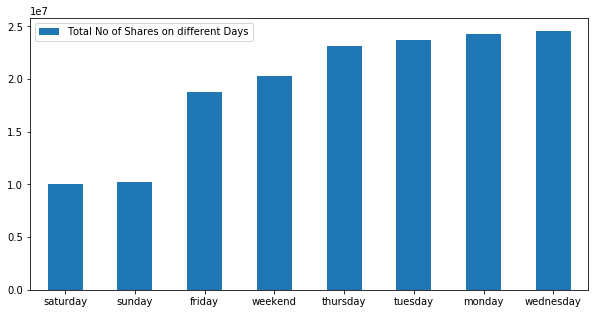

In [45]:
# bar plot of the above DataFrame
#no_shares.plot(kind='bar',title='Total Shares on Different Days')
#no_shares.plot(kind='bar',figsize=(10,5),rot=0)
no_shares.sort_values('Total No of Shares on different Days').plot(kind='bar',figsize=(10,5),rot=0)

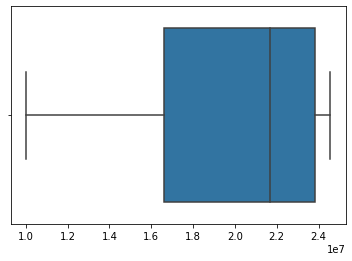

In [46]:
# box plot of the above DataFrame
sns.boxplot(no_shares)

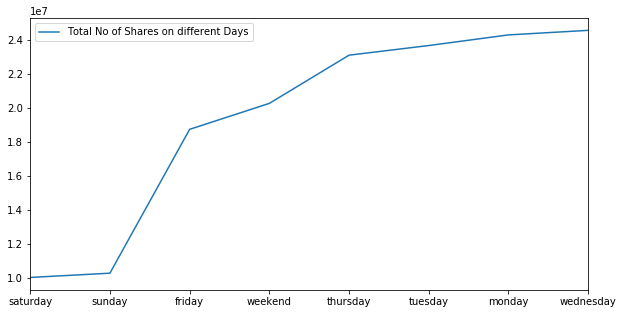

In [47]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,1.5,1.5])
#p1 = no_shares.sort_values('Total No of Shares on different Days')
#plt.plot(p1)
no_shares.sort_values('Total No of Shares on different Days').plot(figsize=(10,5),rot=0)

In [48]:
# separating Weekdays from Weekends
weekdays = list(no_shares.transpose().columns[0:5])
weekdays

['monday', 'tuesday', 'wednesday', 'thursday', 'friday']

In [49]:
# calculating total shares on Weekdays
Total_shares_on_Weekdays = list(no_shares.transpose()[weekdays].sum(axis=1))
Total_shares_on_Weekdays[0]

114347835

In [50]:
# calculating total shares on Weekends
Total_shares_on_Weekends = popularity[popularity['is_weekend']==1]['shares'].sum()
Total_shares_on_Weekends

20258617

In [51]:
# Creating DataFrames to Display Total Shares on Weekends and Weekdays
total_shares1 = [Total_shares_on_Weekdays[0],Total_shares_on_Weekends]
days1 = ['Total No of Shares on Weekdays and Weekends']
no_sharesWW = pd.DataFrame(total_shares1,index=['Weekdays','Weekends'],columns=days1)
no_sharesWW.transpose()

,Weekdays,Weekends
Total No of Shares on Weekdays and Weekends,114347835,20258617


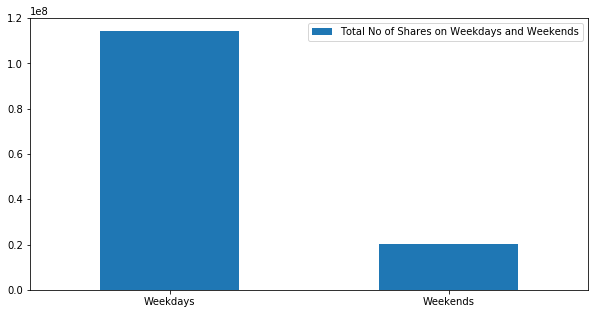

In [52]:
# Plotting the above dataframe to display visually
#no_sharesWW.plot(kind='bar',title='Total Shares on Weekdays and Weekends')
no_sharesWW.plot(kind='bar',figsize=(10,5),rot=0)

In [53]:
# For each of your dataframe column, you could get quantile with:

# q = df["col"].quantile(0.99)
# and then filter with:

# df[df["col"] < q]

In [54]:
q = popularity['shares'].quantile(.99)
q

31656.99999999997

In [55]:
r = popularity[popularity['weekday_is_monday']==1]['shares'].quantile([0,.05,.1,.25,.5,.75,.95,.99,1])
r

0.00         1.0
0.05       559.0
0.10       688.0
0.25       919.0
0.50      1400.0
0.75      2700.0
0.95     11700.0
0.99     37140.0
1.00    690400.0
Name: shares, dtype: float64

In [56]:
s = popularity[popularity['weekday_is_monday']==1]['shares']
q1 = s.quantile(.05)
q2 = s.quantile(.95)
new_pop_shares = popularity[(popularity['shares']>q1) & (popularity['shares']<q2)]
new_pop_shares['shares'].shape

(36165,)

In [57]:
stats.iqr(popularity['shares'])

1854.0

In [58]:
stats.iqr(new_pop_shares['shares'])

1622.0

In [59]:
popularity.shape[0]

39644

In [60]:
round(100*(popularity.shape[0]-new_pop_shares.shape[0])/popularity.shape[0],2)

8.78

In [61]:
#sns.boxplot(popularity[str(popularity.columns)])

In [62]:
# import seaborn as sns
# sns.set(style="ticks", palette="pastel")

# # Load the example tips dataset
# tips = sns.load_dataset("tips")

# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="day", y="total_bill",
#             hue="smoker", palette=["m", "g"],
#             data=tips)
# sns.despine(offset=10, trim=True)

In [63]:
#sns.catplot(kind="box", data=popularity[popularity.columns[31:39]],height=6);

In [64]:
l1 = list(popularity.columns[31:39])
b = [popularity.columns[31:39].str.split('_')[i][len(str(i))-2] for i in range(len(l1))]
print(b)
total_shares = list(popularity['shares'][popularity[i]==1] for i in l1)
total_shares

['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'weekend']


[0          593
 1          711
 2         1500
 3         1200
 4          505
 5          855
 6          556
 7          891
 8         3600
 9          710
 10        2200
 11        1900
 12         823
 13       10000
 14         761
 15        1600
 16       13600
 17        3100
 18        5700
 19       17100
 20        2800
 21         598
 22         445
 23        1500
 24         852
 25         783
 26        1500
 27        1800
 28         462
 29         425
          ...  
 39549     1500
 39550     1200
 39551     1300
 39552     1700
 39553     1200
 39554     1200
 39555     3400
 39556     2100
 39557     1500
 39558     1100
 39559      786
 39560     2100
 39561     4900
 39562     1900
 39563      862
 39564     1800
 39565     1700
 39566     1100
 39567     1500
 39568      984
 39569     6500
 39570     1100
 39571     1100
 39572     3800
 39573      438
 39574     1400
 39575     1300
 39576     1500
 39577      642
 39578     2000
 Name: shares, Length: 6

In [65]:
#sns.dogplot()

In [66]:
# l1 = list(popularity.columns[31:39])
# b = [popularity.columns[31:39].str.split('_')[i][len(str(i))-2] for i in range(len(l1))]
# print(b)
# total_shares = list(popularity['shares'][popularity[i]==1].sum() for i in l1)
# days = ['Total No of Shares on different Days']
# no_shares = pd.DataFrame(total_shares,index=b,columns=days)
# no_shares.transpose()
# sns.catplot(kind="box", data=no_shares.transpose(),height=5);

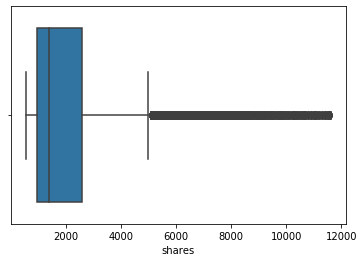

In [67]:
sns.boxplot(new_pop_shares['shares'])

In [68]:
popularity[popularity['weekday_is_monday']==1]['shares'].max()

690400

In [69]:
np.std(popularity[popularity['weekday_is_monday']==1]['shares'])

14689.920338046224

In [70]:
popularity[popularity['weekday_is_monday']==1]['shares'].mean()

3647.0258219486564

In [71]:
popularity[popularity['weekday_is_monday']==1]['shares'].median()

1400.0

In [72]:
stats.mode(popularity[popularity['weekday_is_monday']==1]['shares'])

ModeResult(mode=array([1100], dtype=int64), count=array([428]))

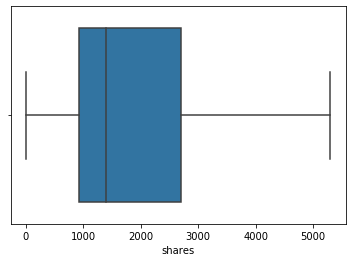

In [73]:
# box plot of the above DataFrame
sns.boxplot(popularity[popularity['weekday_is_monday']==1]['shares'],showfliers=False)

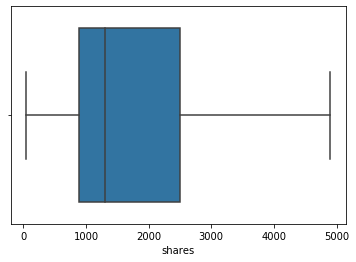

In [74]:
sns.boxplot(popularity[popularity['weekday_is_tuesday']==1]['shares'],showfliers=False)

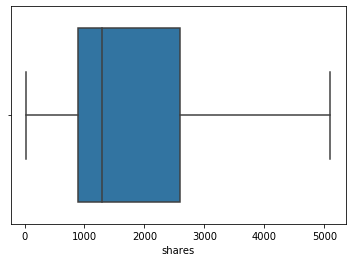

In [75]:
sns.boxplot(popularity[popularity['weekday_is_wednesday']==1]['shares'],showfliers=False)

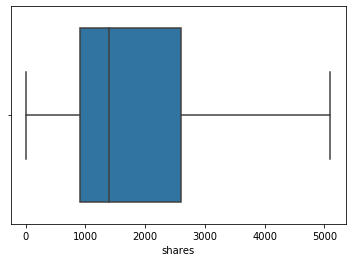

In [76]:
sns.boxplot(popularity[popularity['weekday_is_thursday']==1]['shares'],showfliers=False)

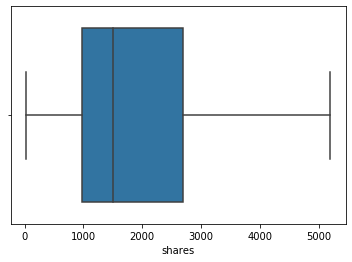

In [77]:
sns.boxplot(popularity[popularity['weekday_is_friday']==1]['shares'],showfliers=False)

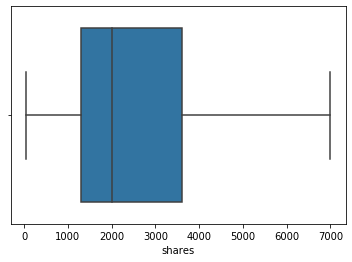

In [78]:
sns.boxplot(popularity[popularity['weekday_is_saturday']==1]['shares'],showfliers=False)

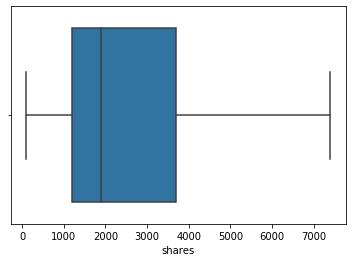

In [79]:
sns.boxplot(popularity[popularity['weekday_is_sunday']==1]['shares'],showfliers=False)

In [80]:
popularity.loc[popularity['weekday_is_monday']==1]['shares']

0          593
1          711
2         1500
3         1200
4          505
5          855
6          556
7          891
8         3600
9          710
10        2200
11        1900
12         823
13       10000
14         761
15        1600
16       13600
17        3100
18        5700
19       17100
20        2800
21         598
22         445
23        1500
24         852
25         783
26        1500
27        1800
28         462
29         425
         ...  
39549     1500
39550     1200
39551     1300
39552     1700
39553     1200
39554     1200
39555     3400
39556     2100
39557     1500
39558     1100
39559      786
39560     2100
39561     4900
39562     1900
39563      862
39564     1800
39565     1700
39566     1100
39567     1500
39568      984
39569     6500
39570     1100
39571     1100
39572     3800
39573      438
39574     1400
39575     1300
39576     1500
39577      642
39578     2000
Name: shares, Length: 6661, dtype: int64

In [81]:
# calculating Median of Shares
np.median(popularity['shares'])

1400.0

In [82]:
a = list(popularity.columns[13:19].str.split('_'))
a

[['data', 'channel', 'is', 'lifestyle'],
 ['data', 'channel', 'is', 'entertainment'],
 ['data', 'channel', 'is', 'bus'],
 ['data', 'channel', 'is', 'socmed'],
 ['data', 'channel', 'is', 'tech'],
 ['data', 'channel', 'is', 'world']]

In [83]:
a[0][len(a[0])-1]

'lifestyle'

In [84]:
b = [popularity.columns[13:19].str.split('_')[i][3] for i in range(len(a))]
b

['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world']

In [85]:
# calculating Channel wise Shares
channels = list(popularity.columns[13:19])
print(channels)
b = [popularity.columns[13:19].str.split('_')[i][3] for i in range(len(channels))]
print(b)
total_shares_channel_wise = list(popularity['shares'][popularity[i]==1].sum() for i in channels)
print(total_shares_channel_wise)
shares_channels = pd.DataFrame(total_shares_channel_wise,index=b, columns=['Total Shares Channel Wise'] )
shares_channels.transpose()

['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']
['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world']
[7728777, 20962727, 19168370, 8431057, 22568993, 19278735]


,lifestyle,entertainment,bus,socmed,tech,world
Total Shares Channel Wise,7728777,20962727,19168370,8431057,22568993,19278735


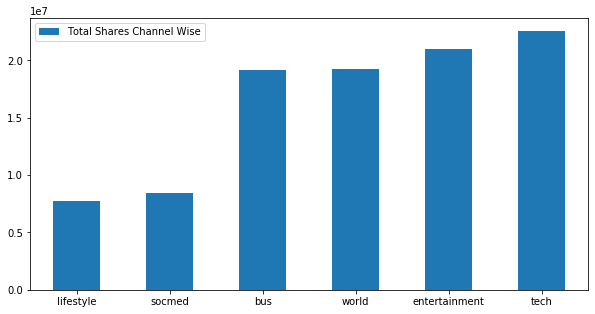

In [86]:
# plotting channel wise shares Plot
#shares_channels.plot(kind='bar',title='Total Shares Channel Wise')
shares_channels.sort_values('Total Shares Channel Wise').plot(kind='bar',figsize=(10,5),rot=0)

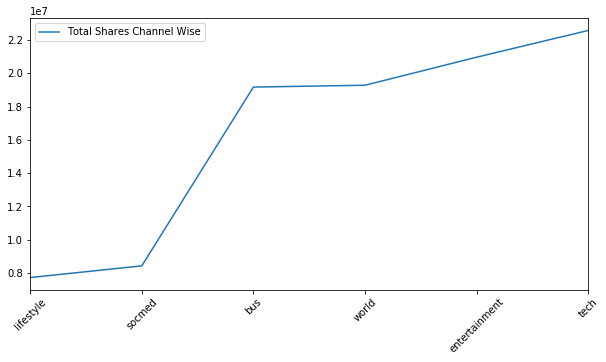

In [87]:
shares_channels.sort_values('Total Shares Channel Wise').plot(figsize=(10,5),rot=45)

In [88]:
# checking how many different channels are there
popularity.columns[13:19]

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

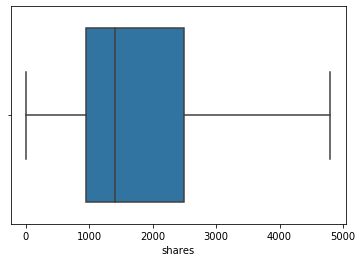

In [89]:
sns.boxplot(popularity[popularity['data_channel_is_bus']==1]['shares'],showfliers=False)

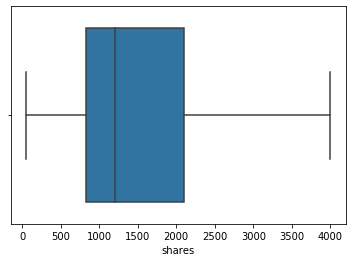

In [90]:
sns.boxplot(popularity[popularity['data_channel_is_entertainment']==1]['shares'],showfliers=False)

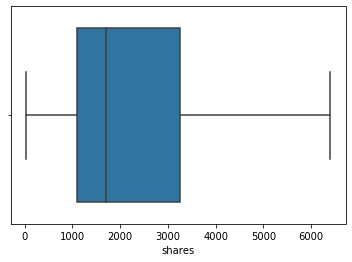

In [91]:
sns.boxplot(popularity[popularity['data_channel_is_lifestyle']==1]['shares'],showfliers=False)

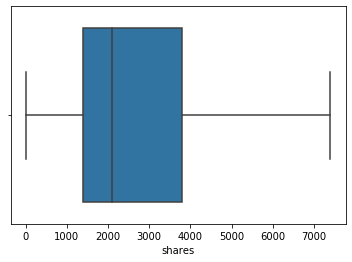

In [92]:
sns.boxplot(popularity[popularity['data_channel_is_socmed']==1]['shares'],showfliers=False)

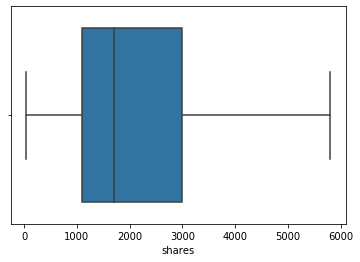

In [93]:
sns.boxplot(popularity[popularity['data_channel_is_tech']==1]['shares'],showfliers=False)

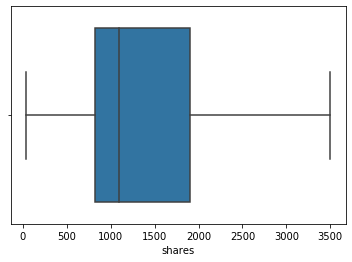

In [94]:
sns.boxplot(popularity[popularity['data_channel_is_world']==1]['shares'],showfliers=False)

In [95]:
# calculating mode of num_keywords column
stats.mode(popularity['num_keywords'])

ModeResult(mode=array([7.]), count=array([7322]))

In [96]:
# calculating mean of the 'shares' column/
np.mean(popularity['shares'])

3395.3801836343455

In [97]:
# calculating median of the shares
np.median(popularity['shares'])

1400.0

In [98]:
# Calculating maximum value of 'shares' column
max(popularity['shares'])

843300

## Achievements Table

In [99]:
# display/Read Table
achievements = pd.read_csv('achievements.csv')
achievements

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN
5,26011001006,Maharashtra,1,Girl,13 years,3.0,2.0,2 siblings,No,Primary,...,Agree,Every day,Once a week,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN
6,26011001007,Maharashtra,1,Girl,14 years,1.0,2.0,1 sibling,No,NaN,...,Agree,Every day,Every day,Never,Every day,Every day,NaN,NaN,NaN,28.57
7,26011001013,Maharashtra,1,Girl,NaN,1.0,2.0,4+ siblings,No,Sr secondary,...,Neither,Every day,Never,Never,Once a week,Every day,NaN,NaN,18.18,NaN
8,26011001014,Maharashtra,1,Girl,NaN,2.0,2.0,2 siblings,No,Primary,...,Agree,Every day,Never,Never,Once a month,Every day,NaN,NaN,23.64,NaN
9,26011001015,Maharashtra,1,Girl,13 years,4.0,2.0,4+ siblings,No,Secondary,...,Neither,Every day,Never,Never,Once a week,Every day,NaN,NaN,NaN,26.53


In [100]:
# checkng for data types
achievements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 64 columns):
STUID                     8801 non-null int64
State                     8801 non-null object
District                  8801 non-null int64
Gender                    8799 non-null object
Age                       8569 non-null object
Category                  8232 non-null float64
Same.language             8572 non-null float64
Siblings                  8801 non-null object
Handicap                  8304 non-null object
Father.edu                8147 non-null object
Mother.edu                7950 non-null object
Father.occupation         7761 non-null object
Mother.occupation         6626 non-null object
Below.poverty             7347 non-null object
Use.calculator            6646 non-null object
Use.computer              6646 non-null object
Use.Internet              6646 non-null object
Use.dictionary            6646 non-null object
Read.other.books          6996 non-null object


In [101]:
# checking rows and columns/
achievements.shape

(8801, 64)

In [102]:
# Calculating various parameters
achievements.describe()

,STUID,District,Category,Same.language,Maths..,Reading..,Science..,Social..
count,8.801000e+03,8801.000000,8232.000000,8572.000000,4190.000000,4227.000000,4144.000000,4119.000000
mean,2.608389e+10,8.255766,2.787293,1.102776,31.601532,55.404436,36.313272,40.502527
std,4.069188e+07,4.065476,1.146670,0.303684,14.734404,23.279043,13.199105,14.479584
min,2.601100e+10,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.604207e+10,4.000000,2.000000,1.000000,22.030000,35.575000,27.270000,30.610000
50%,2.609115e+10,9.000000,3.000000,1.000000,28.070000,56.670000,34.550000,38.780000
75%,2.612121e+10,12.000000,4.000000,1.000000,36.840000,73.330000,43.640000,51.020000
max,2.614127e+10,14.000000,4.000000,2.000000,94.740000,100.000000,85.450000,89.800000


In [103]:
# calculating column wise null values
achievements.isnull().sum()

STUID                        0
State                        0
District                     0
Gender                       2
Age                        232
Category                   569
Same.language              229
Siblings                     0
Handicap                   497
Father.edu                 654
Mother.edu                 851
Father.occupation         1040
Mother.occupation         2175
Below.poverty             1454
Use.calculator            2155
Use.computer              2155
Use.Internet              2155
Use.dictionary            2155
Read.other.books          1805
X..Books                   742
Distance                   334
Computer.use                64
Library.use                197
Like.school                233
Subjects                   109
Give.Lang.HW                66
Give.Math.HW                66
Give.Scie.HW                66
Give.SoSc.HW                66
Correct.Lang.HW            107
                          ... 
Private.tuition             90
English.

In [104]:
# calculating Percentage of null values column wise
round(100*achievements.isnull().sum()/len(achievements),2)

STUID                      0.00
State                      0.00
District                   0.00
Gender                     0.02
Age                        2.64
Category                   6.47
Same.language              2.60
Siblings                   0.00
Handicap                   5.65
Father.edu                 7.43
Mother.edu                 9.67
Father.occupation         11.82
Mother.occupation         24.71
Below.poverty             16.52
Use.calculator            24.49
Use.computer              24.49
Use.Internet              24.49
Use.dictionary            24.49
Read.other.books          20.51
X..Books                   8.43
Distance                   3.80
Computer.use               0.73
Library.use                2.24
Like.school                2.65
Subjects                   1.24
Give.Lang.HW               0.75
Give.Math.HW               0.75
Give.Scie.HW               0.75
Give.SoSc.HW               0.75
Correct.Lang.HW            1.22
                          ...  
Private.

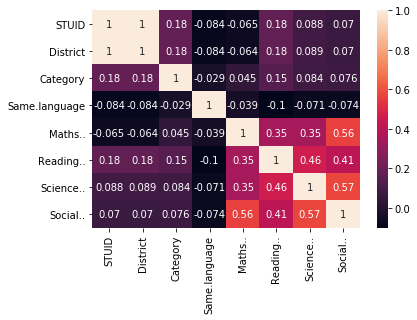

In [105]:
# checking co-relation between different columns
sns.heatmap(achievements.corr(),annot=True)

In [106]:
# displaying all the columns/
list(achievements.columns)

['STUID',
 'State',
 'District',
 'Gender',
 'Age',
 'Category',
 'Same.language',
 'Siblings',
 'Handicap',
 'Father.edu',
 'Mother.edu',
 'Father.occupation',
 'Mother.occupation',
 'Below.poverty',
 'Use.calculator',
 'Use.computer',
 'Use.Internet',
 'Use.dictionary',
 'Read.other.books',
 'X..Books',
 'Distance',
 'Computer.use',
 'Library.use',
 'Like.school',
 'Subjects',
 'Give.Lang.HW',
 'Give.Math.HW',
 'Give.Scie.HW',
 'Give.SoSc.HW',
 'Correct.Lang.HW',
 'Correct.Math.HW',
 'Correct.Scie.HW',
 'Correct.SocS.HW',
 'Help.in.Study',
 'Private.tuition',
 'English.is.difficult',
 'Read.English',
 'Dictionary.to.learn',
 'Answer.English.WB',
 'Answer.English.aloud',
 'Maths.is.difficult',
 'Solve.Maths',
 'Solve.Maths.in.groups',
 'Draw.geometry',
 'Explain.answers',
 'SocSci.is.difficult',
 'Historical.excursions',
 'Participate.in.SocSci',
 'Small.groups.in.SocSci',
 'Express.SocSci.views',
 'Science.is.difficult',
 'Observe.experiments',
 'Conduct.experiments',
 'Solve.science

In [107]:
# filling NaN values with 'Unknown'
achievements['Watch.TV'].fillna(value='Unknown',inplace=True)

In [108]:
# Filling NaN values with mean of the particular column
achievements['Science..'].fillna(value=achievements['Science..'].mean(),inplace=True)

In [109]:
#achievements['Watch.TV'].corr(achievements['Science..'])

In [110]:
# checking different 'labels/Strings' under Watch.Tv column
watchtv_list = list(set(achievements['Watch.TV']))
watchtv_list

['Once a month', 'Once a week', 'Never', 'Unknown', 'Every day']

In [111]:
# making a list of the MEAN data found from Science columns for that particular label/Strings
list([achievements[achievements['Watch.TV']==watchtv_list[i]]['Science..'].mean() for i in range(5)])

[36.53057105996425,
 36.386395691547825,
 35.997256773399,
 31.670198095823093,
 36.33426202692747]

In [112]:
# verifying above vales 
achievements[achievements['Watch.TV']==watchtv_list[4]]['Science..'].mean()

36.33426202692747

In [113]:
# calculating mode of the above code to check for out layers
achievements[achievements['Watch.TV']==watchtv_list[4]]['Science..'].mode()

0    36.313272
dtype: float64

In [114]:
#now making a list of the datas obtained above
watchtv_list = list(set(achievements['Watch.TV']))
science_data = list([achievements[achievements['Watch.TV']==watchtv_list[i]]['Science..'].mean() for i in range(5)])
watchtv_science = pd.DataFrame(science_data,watchtv_list,columns=['Mean Variation TV Watchers'])
watchtv_science.transpose()

,Once a month,Once a week,Never,Unknown,Every day
Mean Variation TV Watchers,36.530571,36.386396,35.997257,31.670198,36.334262


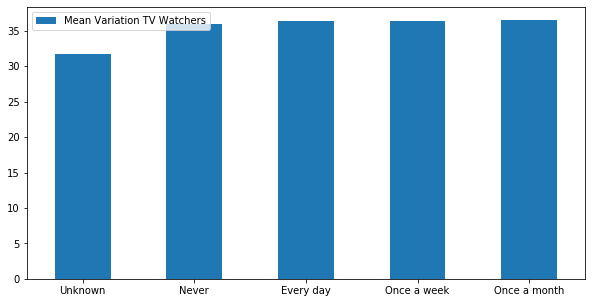

In [137]:
# bar plot of the above DataFrame
#watchtv_science.plot(kind='bar',title='Variation of Science marks w.r.t TV Watchers')
watchtv_science.sort_values('Mean Variation TV Watchers').plot(kind='bar',figsize=(10,5),rot=0)

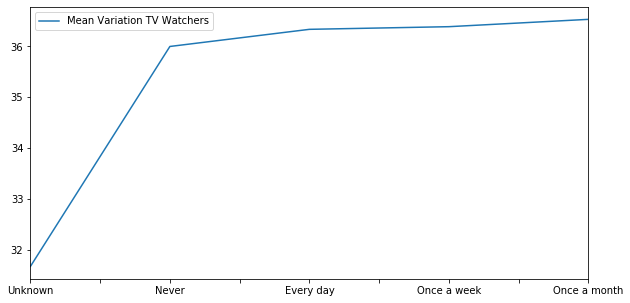

In [116]:
# sorting the column and plotting the above dataFrame
#s = watchtv_science.sort_values('Mean Variation TV Watchers')
#plt.plot(s)
watchtv_science.sort_values('Mean Variation TV Watchers').plot(figsize=(10,5))

##  from the above it is clear that the Watch.TV variable doesn’t distinguish the students significantly in terms of Science marks

In [117]:
# replacing null values with 'Unknown'
achievements['Father.edu'].fillna(value='Unknown',inplace=True)

In [118]:
# checking Null Values
achievements['Father.edu'].isnull().sum()

0

In [119]:
# replacing null vales with mean of that particular column
achievements['Maths..'].fillna(value=achievements['Maths..'].mean(), inplace=True)

In [120]:
# verifying if null got eliminated
achievements['Maths..'].isnull().sum()

0

In [121]:
# making a list of the 'labels' present in the Father.Edu column
list(set(achievements['Father.edu']))

['Secondary',
 'Sr secondary',
 'Unknown',
 'Degree & above',
 'Illiterate',
 'Primary']

In [122]:
# making a dataframe of the values obtained above
father_edu = list(set(achievements['Father.edu']))
maths_data = list([achievements[achievements['Father.edu']==father_edu[i]]['Maths..'].mean() for i in range(6)])
maths_father_edu = pd.DataFrame(maths_data,father_edu,columns=['Mean Variation of Maths vs Fathers Edu'])
maths_father_edu.transpose()

,Secondary,Sr secondary,Unknown,Degree & above,Illiterate,Primary
Mean Variation of Maths vs Fathers Edu,31.896349,32.017068,30.96536,33.162785,30.446879,32.076604


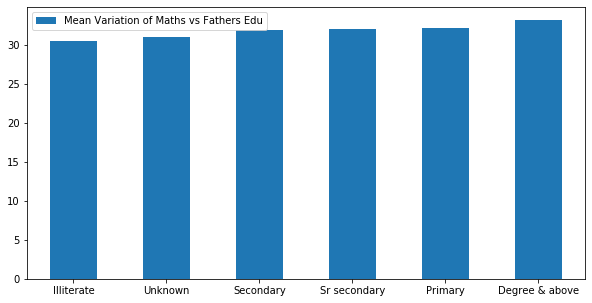

In [138]:
# bar plot of the above dataframe
#maths_father_edu.plot(kind='bar',title='Variation of Maths marks w.r.t Fathers Education')
maths_father_edu.sort_values('Mean Variation of Maths vs Fathers Edu').plot(kind='bar',figsize=(10,5),rot=0)

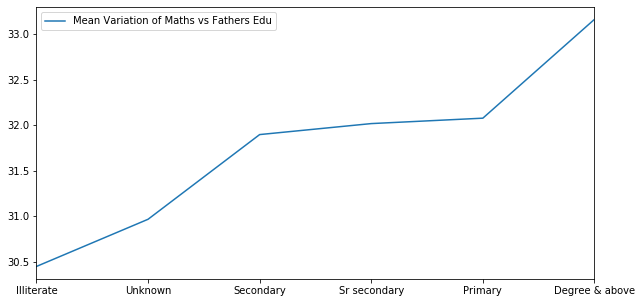

In [124]:
# sort the above dataframe and plot it
#m = maths_father_edu.sort_values('Mean Variation of Maths vs Fathers Edu')
#plt.plot(m)
maths_father_edu.sort_values('Mean Variation of Maths vs Fathers Edu').plot(figsize=(10,5))

## from the aove fig it is clear that  Students whose fathers have a degree and above get better marks on an average

In [125]:
# calculating Null value
achievements['Play.games'].isnull().sum()

44

In [126]:
# replacing null values with 'Unknown'
achievements['Play.games'].fillna(value='Unknown',inplace=True)

In [127]:
# verifying null values after filling it
achievements['Play.games'].isnull().sum()

0

In [128]:
# checking null values
achievements['Reading..'].isnull().sum()

4574

In [129]:
# replacing all null values with mean of that column
achievements['Reading..'].fillna(value=achievements['Reading..'].mean(),inplace=True)

In [130]:
# veriifying the column for null values
achievements['Reading..'].isnull().sum()

0

In [131]:
# list of the all the different lables present in the play_games column
list(set(achievements['Play.games']))

['Once a month', 'Once a week', 'Never', 'Unknown', 'Every day']

In [132]:
# making a dataframe with the above values
play_list = list(set(achievements['Play.games']))
reading_data = list([achievements[achievements['Play.games']==play_list[i]]['Reading..'].mean() for i in range(5)])
play_data = pd.DataFrame(reading_data,play_list,columns=['Mean Variation of Reading marks vs Playing Games'])
play_data.transpose()

,Once a month,Once a week,Never,Unknown,Every day
Mean Variation of Reading marks vs Playing Games,53.667948,57.416298,52.361228,51.116813,55.104369


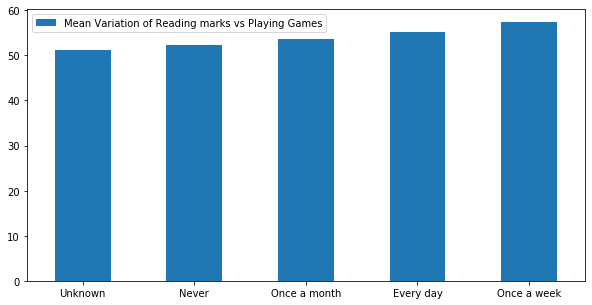

In [139]:
# plotting of the above dataframe
#play_data.plot(kind='bar',title='Mean Variation of Reading marks vs Playing Games')
play_data.sort_values('Mean Variation of Reading marks vs Playing Games').plot(kind='bar',figsize=(10,5),rot=0)

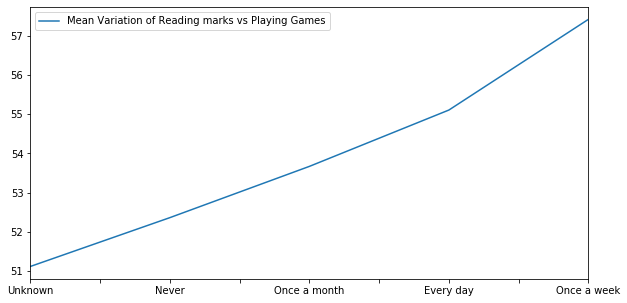

In [134]:
# sorting the above dataframe and plotting
#p = play_data.sort_values('Mean Variation of Reading marks vs Playing Games')
#plt.plot(p)
play_data.sort_values('Mean Variation of Reading marks vs Playing Games').plot(figsize=(10,5))

## from the aove fig it is clear that Students who play games once a week score high in Reading on an average